In [1]:
#this section contains all the commands that need to be run once at the begining of the script
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\sryan\Documents\CareerFoundry\Insta Cart Basket Analysis'

ords_prod_cust = pd.read_pickle(os.path.join(path, '02 data', 'Prepared data', 'orders_products_cust.pkl'))

In [ ]:
ords_prod_cust.info()

## Address Security concerns

In [ ]:
#first namd and surname are both PII.  Since they are not needed for this analysis we can and should remove them
ords_prod_cust_2 = ords_prod_cust.drop(columns = ['First Name', 'Surnam'])

In [ ]:
ords_prod_cust_2.columns

## Creating a regions column based on state

In [ ]:
ords_prod_cust_2.loc[ords_prod_cust_2['STATE'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']), 'region'] = 'Northeast'
ords_prod_cust_2.loc[ords_prod_cust_2['STATE'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Kansas','Minnesota','Iowa','Missouri']), 'region'] = 'Midwest'
ords_prod_cust_2.loc[ords_prod_cust_2['STATE'].isin(['Delaware','Mayrland','District of Cloumbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'region'] = 'South'
ords_prod_cust_2.loc[ords_prod_cust_2['STATE'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'region'] = 'West'

In [ ]:
ords_prod_cust2.head()

In [ ]:
ords_prod_cust_2['region'].value_counts()

In [ ]:
region_cross = pd.crosstab(ords_prod_cust_2['region'], ords_prod_cust_2['spend_flag'], dropna = False)

In [ ]:
region_cross.to_clipboard()

## looking for customers with fewer than 5 orders

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#reviwing existing data to see if the max number of orders a customer has placed is already available
ords_prod_cust_2.head()

In [ ]:
#using max_order data to flag those who have placed fewer than 5 orders
ords_prod_cust_2.loc[ords_prod_cust_2['max_order'] < 5, 'order_act'] = 'low'
ords_prod_cust_2.loc[ords_prod_cust_2['max_order'] >= 5, 'order_act'] = 'high'

In [ ]:
ords_prod_cust_2['order_act'].value_counts()

In [ ]:
#export this customer info for reivew
low_order_activity = ords_prod_cust_2[ords_prod_cust_2['order_act'] == 'low']
high_order_activity = ords_prod_cust_2[ords_prod_cust_2['order_act'] == 'high']

In [ ]:
low_order_activity.head()

In [ ]:
#Exporting both sets of data to a pickle file incase they are needed for further analysis
low_order_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_order_activity.pkl'))
high_order_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_order_activity.pkl'))

## divide the ages into groups

- to make working with age data easier I'm dividing them into 3 groups
    * 33 and under - Young
    * 33 to 64 - Middle Age
    * 65+ Older
    
These groups are based on quartile info below

In [ ]:
active_cust['Age'].describe()

In [ ]:
ords_prod_cust_2.loc[ords_prod_cust_2['Age'] < 33, 'age group'] = 'Young'
ords_prod_cust_2.loc[(ords_prod_cust_2['Age'] >= 33) & (ords_prod_cust_2['Age'] < 65), 'age group'] = 'Middle Age' 
ords_prod_cust_2.loc[ords_prod_cust_2['Age'] >= 65, 'age group'] = 'Older'

## adding the department names to the dataset

In [ ]:
df_dept = pd.read_csv(os.path.join(path, '02 data', 'Prepared data', 'departments_wrangled.csv'))

In [ ]:
df_dept.head()

In [ ]:
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [ ]:
df_dept.head()

In [ ]:
ords_prod_cust_3 = ords_prod_cust_2.merge(df_dept, on = 'department_id', indicator = False)

In [ ]:
ords_prod_cust_4 = ords_prod_cust_3.drop(columns = ['_merge'])

In [ ]:
ords_prod_cust_4.head()

## exporting full PII cleaned data set to a pickle file

In [ ]:
ords_prod_cust_4.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_cust_no_name.pkl'))

## Creating a subset of the data for future analysis

In [ ]:
#creating a list of random numbers between 0 and 1 then using that to create a 70/30 split of the data
np.random.seed(4)
dev=np.random.rand(len(ords_prod_cust_3))<=0.7
big=ords_prod_cust_3[dev]
small=ords_prod_cust_3[~dev]

In [ ]:
big.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_cust_no_name_big.pkl'))
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_cust_no_name_small.pkl'))

## Importing just the data needed to complete the rest of the analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\sryan\Documents\CareerFoundry\Insta Cart Basket Analysis'

active_cust = pd.read_pickle(os.path.join(path, '02 data', 'Prepared data', 'orders_cust_no_name.pkl'))
active_cust_small = pd.read_pickle(os.path.join(path, '02 data', 'Prepared data', 'orders_cust_no_name_small.pkl'))

In [ ]:
pd.set_option('display.max_columns', None)
active_cust.info()

In [2]:
active_cust.shape

(32404859, 35)

In [3]:
low_cust = pd.read_pickle(os.path.join(path, '02 data', 'Prepared data', 'low_order_activity.pkl'))

In [4]:
low_cust.shape

(1440295, 33)

## Key question 1 what are the busiest days of the week and hours of the day

In [ ]:
active_cust['orders_day_of_week'].describe()

In [ ]:
#Creates customer y axis labels and defines their position
y_labels = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thrusday','Friday']
y_pos = np.arange(len(x_labels))

hist_odow = active_cust['orders_day_of_week'].plot.hist(rot=45,
                                                      title='Orders by Day of the week',
                                                     range = (-.25,6.75),
                                                     bins = 7,
                                                     width = .5,
                                                     figsize=(6,4))

#plt.tick_params(labelbottom=False) removes labels from x axis
plt.xticks(y_pos, y_labels, rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
hist_odow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_odow.png'))

In [ ]:
#create custom time labels and set their spacing
hours = ['midnight','','','','','','6 AM','','','','','','Noon','','','','','','6 PM','','','','','']
hours_pos = np.arange(24)

hist_ohod = active_cust['order_hour_of_day'].plot.hist(bins=24, figsize=(6,4), 
                                                     title='Orders by Hour of the Day',
                                                    range = (-.25,23.75),
                                                    width = .5)

plt.xticks(hours_pos, hours, rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
#export the chart
hist_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohod.png'))

## Key Question 2 Spend analysis

- time of day most money is spent

In [ ]:
active_cust.columns

In [ ]:
#spend_tod = active_cust.groupby('order_hour_of_day')['prices'].sum()
spend_tod = active_cust.groupby('order_hour_of_day').agg(total=('prices', 'sum'))

In [ ]:
spend_tod.head(7)

In [ ]:
spend_hod = spend_tod.plot.bar(legend = None)

plt.title('Spending by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.tight_layout()

In [ ]:
spend_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spend_hod_hist.png'))

## Key question 3 creating a simplier pricing structure

In [ ]:
active_cust['price_range_loc'].value_counts()

In [ ]:
price_range_bar = active_cust['price_range_loc'].value_counts().plot.bar(rot = 45)

plt.title('Product Price Range')
#plt.xlabel('Hour of the Day')
plt.tight_layout()

In [ ]:
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

In [ ]:
crosstab_loyalty_counts_stats = active_cust.groupby('loyalty_flag').agg({'order_id': ['count'], 'prices': ['min', 'mean', 'max'], 'orders_day_of_week': ['median'], 'order_hour_of_day': ['median']}, dropna = False)

In [ ]:
crosstab_loyalty_counts_stats.to_clipboard()

In [ ]:
active_cust['prices'].describe()

## Key question 4 what departments have the highest purchase frequency

In [ ]:
active_cust.sort_values(by = ['prices'], ascending = False)

In [ ]:
dept_freq = active_cust['department'].value_counts().plot.barh(figsize = (8,4))

plt.title('Department Purchase Frequency')
plt.tight_layout()
dept_freq.invert_yaxis()

In [ ]:
dept_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_freq_bar.png'))

## key question 5 Marketing's information reqests

### Key question 5a distribution of customers based on loyalty

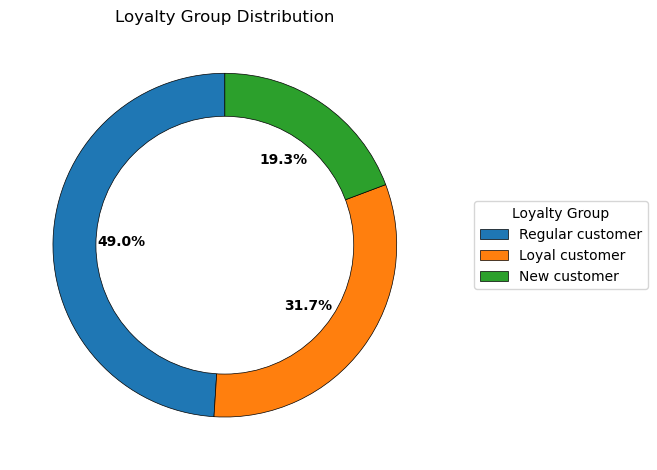

In [27]:
loyalty_group__pie = active_cust['loyalty_flag'].value_counts().plot.pie(startangle = 90,
                                                                         autopct='%1.1f%%',
                                                                         textprops=dict(weight='bold'),
                                                                         labeldistance = None,
                                                                         wedgeprops={'edgecolor':'black','linewidth':.5})

centre_circle = plt.Circle((0,0),0.75,
                           color='black', 
                           fc='white',
                           linewidth=.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1),
          title = 'Loyalty Group')

plt.title('Loyalty Group Distribution')
plt.ylabel(None)
plt.tight_layout()

In [28]:
loyalty_group__pie.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'donut_loyalty_dist.png'),
                                 bbox_inches = 'tight')

### Key question 5b Are there differences in ordering habits based on loyalty

In [19]:
#loyalty hour of the day
loyalty_hod = active_cust_small[['loyalty_flag', 'order_hour_of_day']]

In [20]:
crosstab_loyalty_hod = pd.crosstab(loyalty_hod['order_hour_of_day'], 
                                   loyalty_hod['loyalty_flag'], dropna = False)

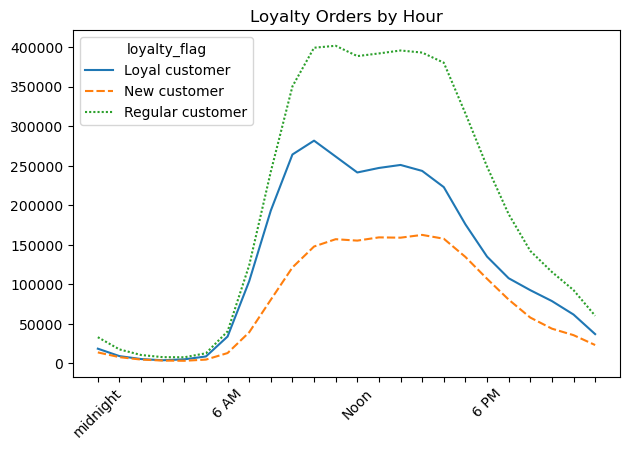

In [21]:
#Creates customer y axis labels and defines their position
hours = ['midnight','','','','','',
         '6 AM','','','','','',
         'Noon','','','','','',
         '6 PM','','','','','']
hours_pos = np.arange(24)

line_loyalty_hod = sns.lineplot(data=crosstab_loyalty_hod)

plt.title('Loyalty Orders by Hour')
plt.xticks(hours_pos, hours, rotation = 45)
plt.tight_layout()
plt.xlabel(None)
#plt.ylabel('Count of Orders')
plt.show()

In [22]:
line_loyalty_hod.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'line_loyalty_hod.png'),
                                 bbox_inches = 'tight')

Loyalty orders day of the week

In [23]:
#loyalty day of the week
loyalty_dow = active_cust_small[['loyalty_flag', 'orders_day_of_week']]

In [24]:
crosstab_loyalty_hod = pd.crosstab(loyalty_dow['orders_day_of_week'], loyalty_hod['loyalty_flag'], dropna = False)

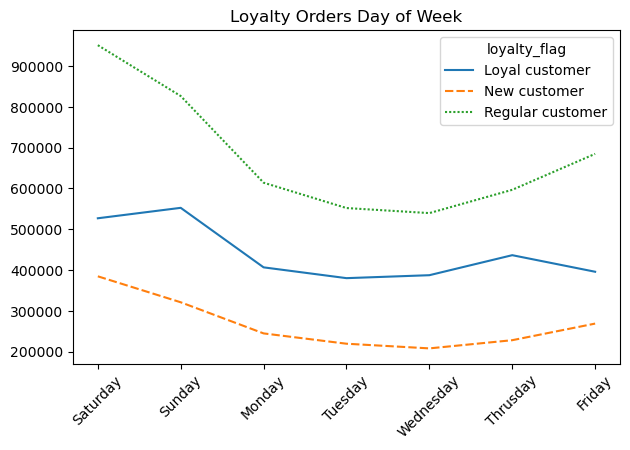

In [25]:
#Creates customer y axis labels and defines their position
days = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thrusday','Friday']
days_pos = np.arange(len(days))

line_loyalty_dow = sns.lineplot(data=crosstab_loyalty_hod)

plt.title('Loyalty Orders Day of Week')
plt.xticks(days_pos, days, rotation = 45)
plt.tight_layout()
plt.xlabel(None)
#plt.ylabel('Count of Orders')
plt.show()

In [26]:
line_loyalty_dow.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'line_loyalty_dow.png'),
                                 bbox_inches = 'tight')

loyalty and price range

In [30]:
crosstab_loyalty_price_range = pd.crosstab(active_cust['price_range_loc'], 
                                           active_cust['loyalty_flag'], 
                                           dropna=False)

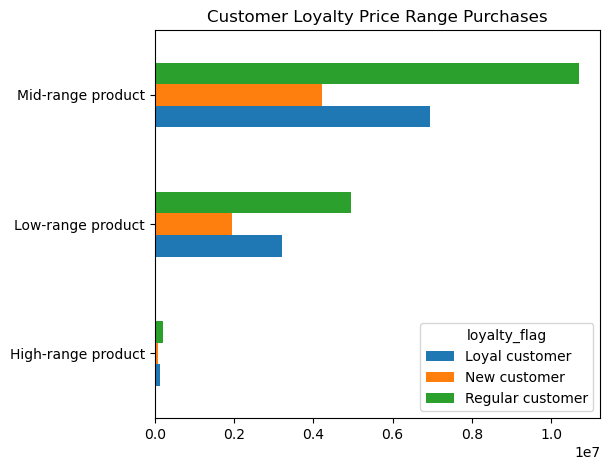

In [31]:
loyalty_bar = crosstab_loyalty_price_range.plot.barh()

plt.title('Customer Loyalty Price Range Purchases')
plt.tight_layout()
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [32]:
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'bar_loyalty_price_range.png'),
                                 bbox_inches = 'tight')

Department purchase by loyalty

In [33]:
crosstab_department_loyalty = pd.crosstab(active_cust['department'], active_cust['loyalty_flag'], dropna=False)

In [34]:
ct_loyalty_sort = crosstab_department_loyalty.sort_values(by='Regular customer', ascending = False)

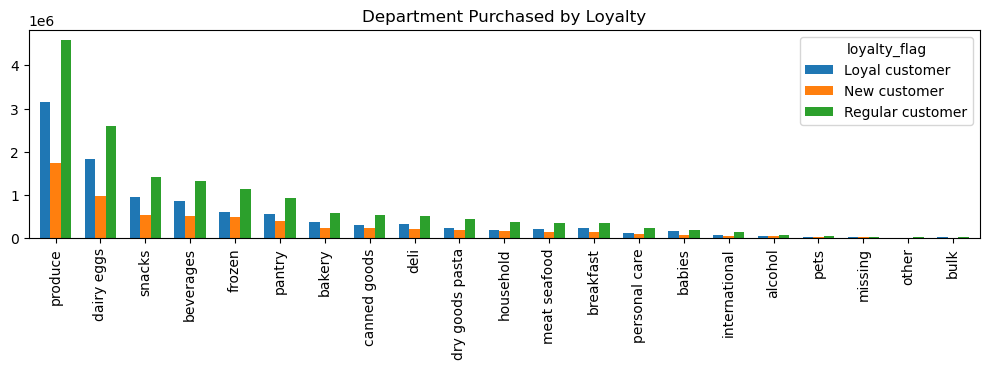

In [35]:
department_bar = ct_loyalty_sort.plot.bar(figsize = (10,4),
                                                    width = .7)

plt.title('Department Purchased by Loyalty')
plt.tight_layout()
plt.xlabel(None)
plt.show()

In [37]:
department_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'bar_loyalty_dept.png'),
                                 bbox_inches = 'tight')

### Key question 5c Are there differences in purchasing based on customer region

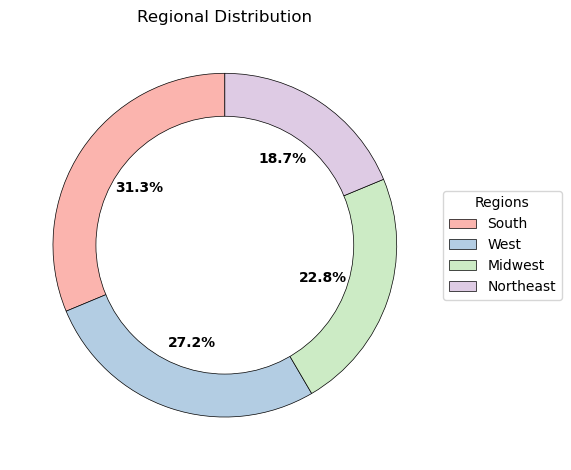

In [38]:
#regional distribution of customers
region_pie = active_cust['region'].value_counts().plot.pie(startangle = 90,
                                                          autopct='%1.1f%%',
                                                          textprops=dict(weight='bold'),
                                                          colors = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4'],
                                                          labeldistance = None,
                                                          wedgeprops={'edgecolor':'black','linewidth':.5})

plt.legend(loc = 'center right',
          bbox_to_anchor=(.8, 0, 0.5, 1),
          title = 'Regions')
plt.title('Regional Distribution')
plt.tight_layout()
plt.ylabel(None)

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
region_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_dist_pie.png'))

Customer Loyalty by region

In [39]:
#Customer loyalty by region
crosstab_loyalty_region = pd.crosstab(active_cust['loyalty_flag'], active_cust['region'], dropna=False)

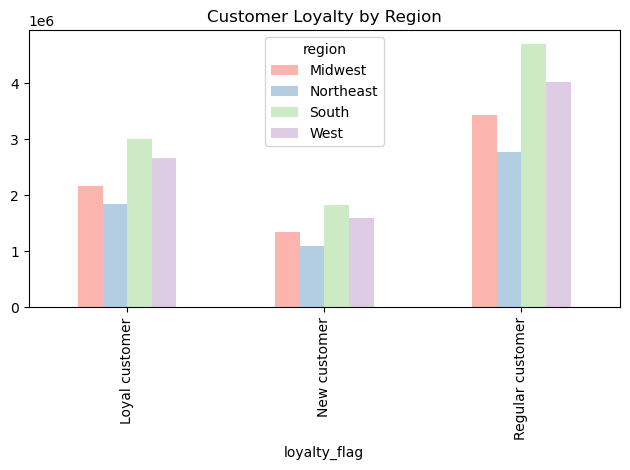

In [40]:
loyalty_region_bar = crosstab_loyalty_region.plot.bar(color = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4'])

plt.title('Customer Loyalty by Region')
plt.tight_layout()
plt.show()

In [41]:
loyalty_region_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'bar_loyalty_region.png'),
                                 bbox_inches = 'tight')

Department sales by region

In [42]:
crosstab_department_region = pd.crosstab(active_cust['department'], active_cust['region'], dropna=False)

In [ ]:
crosstab_department_region.head()

In [43]:
ct_region_sort = crosstab_department_region.sort_values(by='South', ascending = False)

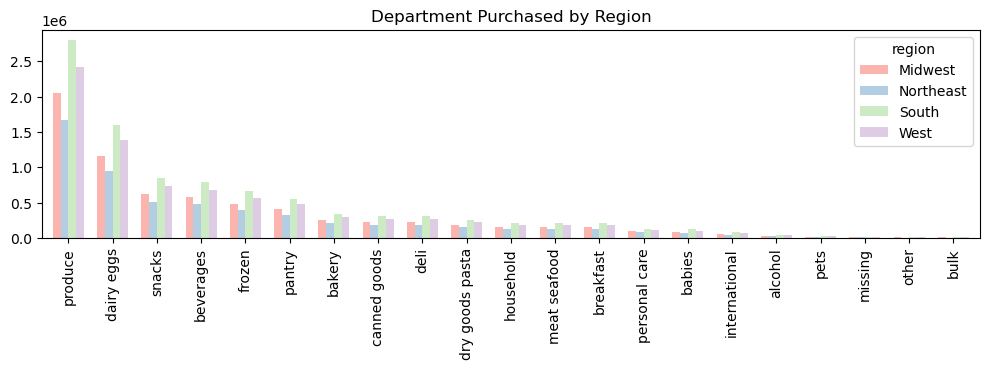

In [84]:
department_region_bar = ct_region_sort.plot.bar(figsize = (10,4),
                                         width = .7,
                                        color = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4'])

plt.title('Department Purchased by Region')
plt.tight_layout()
plt.xlabel(None)
plt.show()

In [85]:
department_region_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'bar_region_dept.png'),
                                 bbox_inches = 'tight')

price range by region

In [47]:
crosstab_region_price_range = pd.crosstab(active_cust['price_range_loc'], 
                                           active_cust['region'], 
                                           dropna=False)

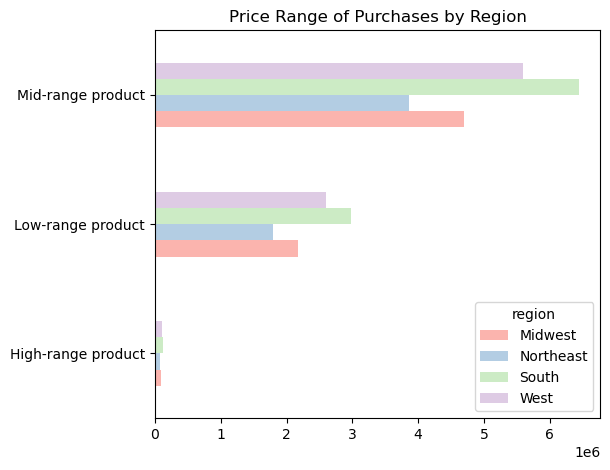

In [48]:
region_price_range_bar = crosstab_region_price_range.plot.barh(color = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4'])

plt.title('Price Range of Purchases by Region')
plt.tight_layout()
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [49]:
region_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'bar_region_price_range.png'),
                                 bbox_inches = 'tight')

### Key question 5d Is there a connection between age and family status in terms of ordering habits?

Family status distribution

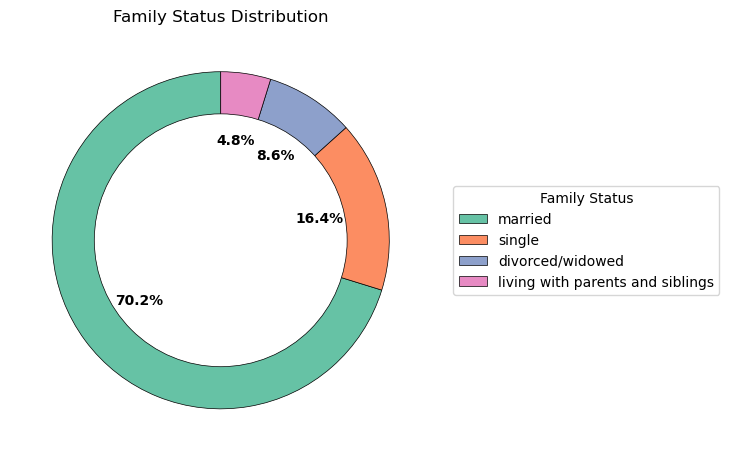

In [51]:
family_status_pie = active_cust['fam_status'].value_counts().plot.pie(startangle = 90,
                                                                         autopct='%1.1f%%',
                                                                         textprops=dict(weight='bold'),
                                                                         colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3'],
                                                                         labeldistance = None,
                                                                         wedgeprops={'edgecolor':'black','linewidth':.5})


plt.legend(loc = 'center right',
          bbox_to_anchor=(1.2, 0, 0.5, 1),
          title = 'Family Status')
plt.title('Family Status Distribution')
plt.ylabel(None)
plt.tight_layout()

centre_circle = plt.Circle((0,0),0.75,
                           color='black', 
                           fc='white',
                           linewidth=.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


In [52]:
family_status_pie.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'pie_family_status.png'),
                                 bbox_inches = 'tight')

Family status by region

In [53]:
crosstab_fam_stat_region = pd.crosstab(active_cust['fam_status'], active_cust['region'], dropna=False)

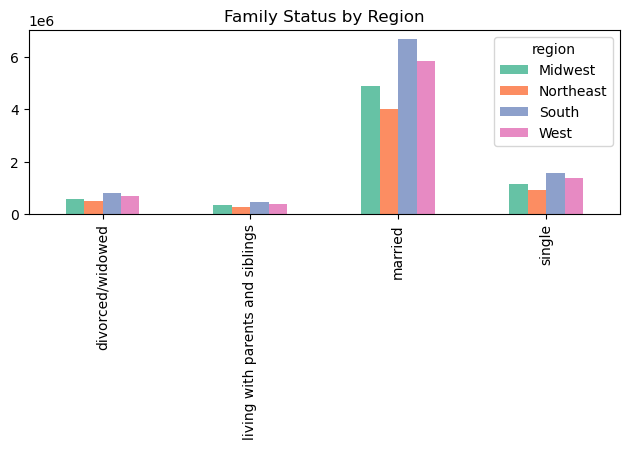

In [56]:
fam_stat_region_bar = crosstab_fam_stat_region.plot.bar(color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])

plt.title('Family Status by Region')
plt.tight_layout()
plt.xlabel(None)
plt.show()

In [57]:
fam_stat_region_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'fam_stat_region.png'),
                                 bbox_inches = 'tight')

Department purchases by family status

In [58]:
crosstab_fam_stat_dept = pd.crosstab(active_cust['department'], active_cust['fam_status'], dropna=False)

In [ ]:
crosstab_fam_stat_dept.head()

In [59]:
ct_fam_stat_dept = crosstab_fam_stat_dept.sort_values(by='married', ascending = False)

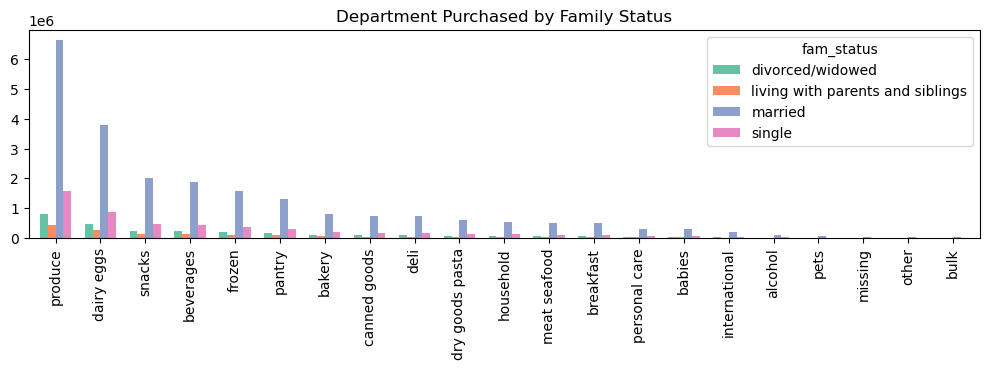

In [62]:
fam_stat_dept_bar = ct_fam_stat_dept.plot.bar(figsize = (10,4),
                                         width = .7,
                                        color = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])

plt.title('Department Purchased by Family Status')
plt.tight_layout()
plt.xlabel(None)
plt.show()

In [63]:
fam_stat_dept_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'bar_fam_stat_dept.png'),
                                 bbox_inches = 'tight')

Family status order hour of the day

In [77]:
fam_status_dow = pd.crosstab(active_cust_small['orders_day_of_week'], active_cust_small['fam_status'], dropna = False)

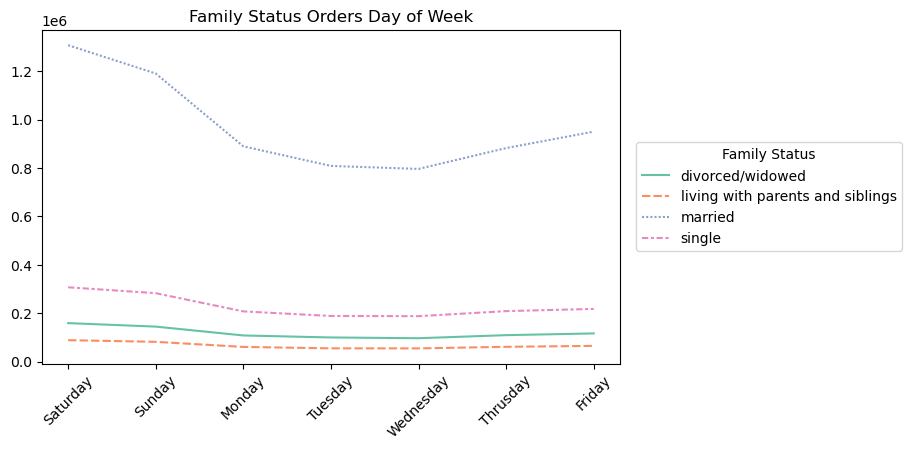

In [110]:
#Creates customer y axis labels and defines their position
days = ['Saturday','Sunday','Monday','Tuesday','Wednesday','Thrusday','Friday']
days_pos = np.arange(len(days))

line_fam_status_dow = sns.lineplot(data=fam_status_dow,
                               palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])

plt.title('Family Status Orders Day of Week')
plt.xticks(days_pos, days, rotation = 45)
plt.tight_layout()
plt.xlabel(None)
#plt.ylabel('Number of Orders')

plt.legend(loc = 'center right',
          bbox_to_anchor=(1.0, 0, 0.5, 1),
          title = 'Family Status')

plt.show()

In [111]:
line_fam_status_dow.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'line_family_status_dow.png'),
                                 bbox_inches = 'tight')

Family status order day of the week

In [81]:
fam_status_hod = pd.crosstab(active_cust['order_hour_of_day'], 
                                   active_cust['fam_status'], dropna = False)

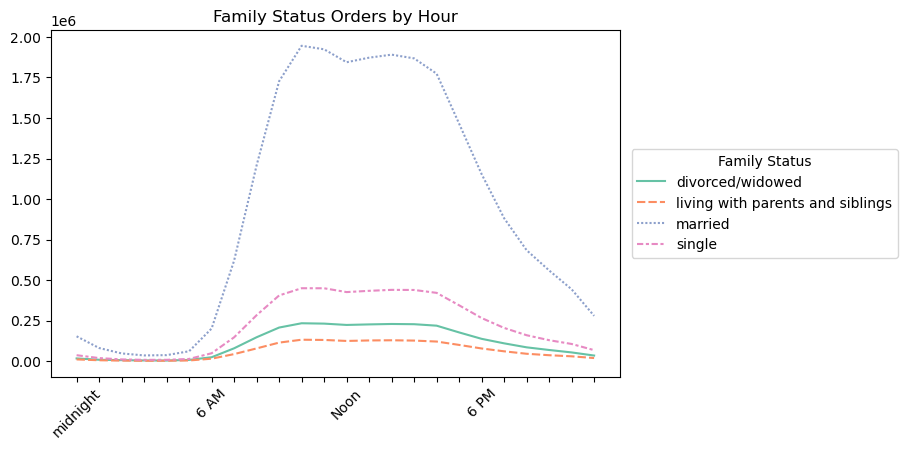

In [99]:
#Creates customer y axis labels and defines their position
hours = ['midnight','','','','','',
         '6 AM','','','','','',
         'Noon','','','','','',
         '6 PM','','','','','']
hours_pos = np.arange(24)

line_fam_status_hod = sns.lineplot(data=fam_status_hod,
                                  palette = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3'])

plt.title('Family Status Orders by Hour')
plt.xticks(hours_pos, hours, rotation = 45)
plt.tight_layout()
plt.xlabel(None)

plt.legend(loc = 'center right',
          bbox_to_anchor=(1.0, 0, 0.5, 1),
          title = 'Family Status')

#plt.ylabel('Count of Orders')
plt.show()

In [100]:
line_fam_status_hod.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'line_family_status_hod.png'),
                                 bbox_inches = 'tight')

Age group distribution

In [ ]:
#age group distribution
age_pie = active_cust['age group'].value_counts().plot.pie(startangle = 90,
                                                          autopct='%1.1f%%',
                                                          textprops=dict(weight='bold'),
                                                          colors = ['#377eb8','#4daf4a','#984ea3','#ff7f00'],
                                                            labeldistance = None,
                                                           wedgeprops={'edgecolor':'black','linewidth':.5})

plt.legend(loc = 'center right',
          bbox_to_anchor=(1, 0, 0.5, 1),
          title = 'Age Group')
plt.title('Age Group Distribution')
plt.ylabel(None)

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
age_pie.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'pie_age.png'),
                                 bbox_inches = 'tight')

Age by region

In [ ]:
crosstab_fam_stat_region = pd.crosstab(active_cust['age group'], active_cust['region'], dropna=False)

In [ ]:
fam_stat_region_bar = crosstab_fam_stat_region.plot.bar(color = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4'])

plt.title('Family Status by Region')
plt.tight_layout()
plt.xlabel(None)
plt.show()

In [ ]:
fam_stat_region_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'fam_stat_region.png'),
                                 bbox_inches = 'tight')

Department purchases by age

In [ ]:
crosstab_age_group_dept = pd.crosstab(active_cust['department'], active_cust['age group'], dropna=False)

In [ ]:
crosstab_age_group_dept.head()

In [ ]:
ct_age_group_dept = crosstab_fam_stat_dept.sort_values(by='Middle Age', ascending = False)

In [ ]:
age_group_dept_bar = ct_age_group_dept.plot.bar(figsize = (10,4),
                                         width = .7,
                                        color = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4'])

plt.title('Department Purchased by Age Group')
plt.tight_layout()
plt.xlabel(None)
plt.show()

In [ ]:
age_group_dept_bar.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'bar_age_group_dept.png'),
                                 bbox_inches = 'tight')

In [ ]:
crosstab_age_group_fam_status = pd.crosstab(active_cust['fam_status'], 
                                           active_cust['age group'], 
                                           dropna=False)

In [ ]:
age_group_fam_status_bar = crosstab_age_group_fam_status.plot.barh(color = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4'])

#plt.title('Age Group and Family Status')
plt.tight_layout()
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [ ]:
dependants_pie = active_cust['n_dependants'].value_counts().plot.pie(startangle = 90,
                                                          autopct='%1.1f%%',
                                                          textprops=dict(weight='bold'),
                                                          colors = ['#377eb8','#4daf4a','#984ea3','#ff7f00'],                                                            
                                                           wedgeprops={'edgecolor':'black','linewidth':.5})

plt.title('Number of Dependants')
plt.ylabel(None)

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
dependants_pie.figure.savefig(os.path.join(path, '04 Analysis',
                                               'Visualizations',
                                               'pie_dependants.png'),
                                 bbox_inches = 'tight')

## Data Summary

In [6]:
active_cust.columns

Index(['order_id', 'user_id', 'Cust_order_num', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'hour_busyness', 'max_order', 'loyalty_flag',
       'mean_price', 'spend_flag', 'median_days_since_last',
       'purchase_frequency', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'region', 'order_act',
       'age group', 'department'],
      dtype='object')

In [18]:
active_cust['age group'].value_counts().to_clipboard()